#**Compare whether the experimental data supports the proposed gene network**

Keywords: System Biology, Protein, mRNA, modelling, Medicine,Algorithm, Optimization

In biology,the mRNA control how many protein can be produced. But protein can also promote or inhibit the mRNA production. This create a system which allow the body to control the level of different chemical. It is important for human to know these relationships since it can help the medicine to precisely target.

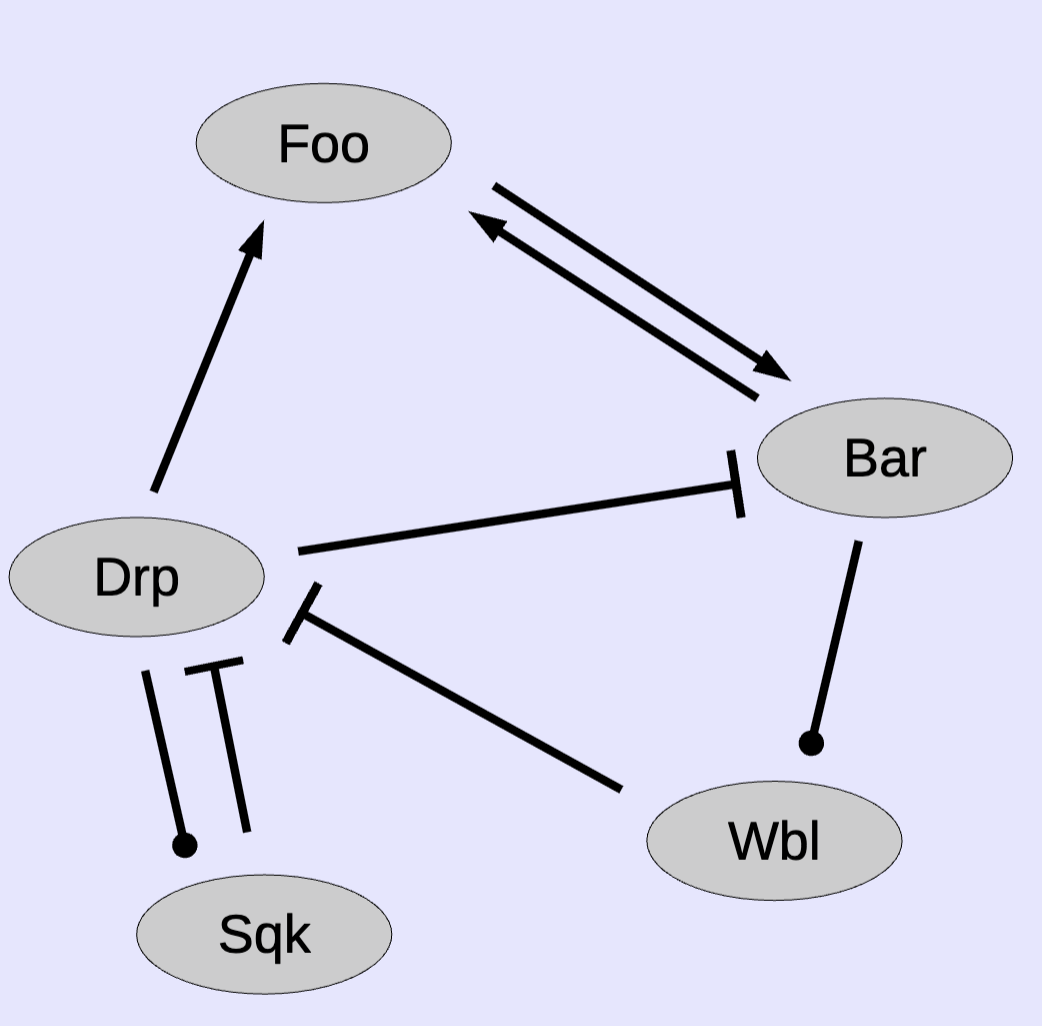
This system represents a gene regulatory algorithm where proteins act as signals that activate or repress one another.

Positive feedback: Foo and Bar mutually activate, forming a bistable switch.

Negative feedback: Bar represses Drp, while Drp represses Bar and others, stabilizing the system.

Hierarchical control: Drp functions as a central regulator, shaping overall network behavior.

Uncertainty: Some links are context-dependent, making the system tunable.

Together, these rules create an algorithm capable of switch-like decisions, oscillations, or stable states, depending on conditions.

We develop a model to simulate these regulatory interactions, and the following code tests how well the experimental data agree with the model predictions.

## **1. Environment**




This notebook defines a reproducible conda-managed environment for the myproject workflow. The environment is based on Python 3.9 and integrates essential data analysis and machine learning packages such as NumPy, Pandas, Matplotlib, and Scikit-learn. Additional dependencies ensure compatibility for visualization, time series handling, and efficient computation.
name: myproject
channels:
  - conda-forge
dependencies:
  - python=3.9
  - pip
  - pip:
      - contourpy==1.3.0
      - cycler==0.12.1
      - fonttools==4.57.0
      - importlib_resources==6.5.2
      - joblib==1.5.1
      - kiwisolver==1.4.7
      - matplotlib==3.9.4
      - numpy==2.0.2
      - packaging==25.0
      - pandas==2.2.3
      - pillow==11.2.1
      - pyparsing==3.2.3
      - python-dateutil==2.9.0.post0
      - pytz==2025.2
      - scikit-learn==1.6.1
      - scipy==1.13.1
      - threadpoolctl==3.6.0
      - tqdm==4.67.1
      - tzdata==2025.2
      - zipp==3.21.0


## **2. Data fetching**

Experimental data are integrated into the computational framework. Two distinct data types are considered: (i) mRNA, representing the transcript levels associated with each protein, and (ii) protein, representing the corresponding protein abundance measurements.

In [2]:
content1 = """# #time	foo	bar	sqk	drp	wbl
0.000000000000000000e+00 2.991645506552696454e-01 3.688868410072349696e-02 3.781318107763810832e-01 3.104032698338307639e-01 5.440899859901041774e-02
5.000000000000000000e+00 5.585515554662570104e-01 3.458811420791785274e-02 3.618244149469315163e-01 2.899221451026707808e-01 2.158648550157159784e-01
1.000000000000000000e+01 5.776262826219527025e-01 3.433004920239662167e-02 3.607533254409965862e-01 2.115412371300737226e-01 3.175577463157067681e-01
1.500000000000000000e+01 4.371451605660955364e-01 3.945109495838642483e-02 3.689626856259982102e-01 1.554560642442379403e-01 4.102414099200179520e-01
2.000000000000000000e+01 2.770373671027050455e-01 4.830414516154018373e-02 3.797655532667483791e-01 1.136966092825689029e-01 5.484334597878051110e-01
2.500000000000000000e+01 1.520774398074808686e-01 5.944128319120936532e-02 3.905799414838624362e-01 8.003487462630172466e-02 7.450384597879085025e-01
3.000000000000000000e+01 7.436758730328690836e-02 5.782851574588736970e-02 4.001049528876872152e-01 5.644218204573939884e-02 9.225659639766438103e-01
3.500000000000000000e+01 3.504088431107626328e-02 2.130795836135820215e-02 4.072607233459002996e-01 4.674260506743729837e-02 8.164869279593810480e-01
4.000000000000000000e+01 1.995363031145061181e-02 3.304925577538736243e-03 4.111382164702172548e-01 5.667950489917933377e-02 3.865630977772005483e-01
4.500000000000000000e+01 2.216530898006767100e-02 8.104329180912522553e-04 4.104307573800729525e-01 9.893391894897492211e-02 1.066807300186564805e-01
5.000000000000000000e+01 5.903266823052052970e-02 2.035228236796345156e-03 4.024252697196344375e-01 1.842345101815446584e-01 2.542493286666501137e-02
5.500000000000000000e+01 2.074844643543699296e-01 2.684408770541881623e-02 3.853623464394711484e-01 2.854438815912740401e-01 2.382465454740581579e-02
6.000000000000000000e+01 4.865050426650747717e-01 3.641195834082808225e-02 3.659863031862790606e-01 3.120748930888521677e-01 1.630051726743929896e-01
6.500000000000000000e+01 5.985311048190889993e-01 3.365762562193735236e-02 3.595911319578758980e-01 2.367951906501243320e-01 2.876290390080484261e-01
7.000000000000000000e+01 4.927659580503321868e-01 3.722747008361602244e-02 3.656151735310524953e-01 1.725472272488086656e-01 3.749663052563153576e-01
7.500000000000000000e+01 3.298507592416625167e-01 4.485648003401067341e-02 3.759528488005927094e-01 1.271311546517915614e-01 4.938348957585715349e-01
8.000000000000000000e+01 1.899108118658600075e-01 5.566800088501722144e-02 3.869334400440195831e-01 9.069094588133674861e-02 6.721939279366796471e-01
8.500000000000000000e+01 9.608906959496167632e-02 6.226189692173716983e-02 3.970338359791815708e-01 6.321043922078273258e-02 8.761730023720337712e-01
9.000000000000000000e+01 4.526720636687686650e-02 3.477049377786536194e-02 4.051164146395124788e-01 4.825973625847428117e-02 9.034022639553982437e-01
9.500000000000000000e+01 2.308759514201237650e-02 6.451477332668659713e-03 4.102299195099997631e-01 5.041843827722421179e-02 5.405064537091867072e-01
1.000000000000000000e+02 1.925173402982259183e-02 1.120868333106803984e-03 4.113293950077375749e-01 7.964723420485375627e-02 1.726969721221946752e-01
1.050000000000000000e+02 3.907994258874928489e-02 1.044831535784780012e-03 4.062196371993597177e-01 1.504633952170820743e-01 4.118753706340388260e-02
1.100000000000000000e+02 1.370425243231605528e-01 1.264876253458076943e-02 3.921206178919813268e-01 2.525409924714719367e-01 1.550271066224990189e-02
1.150000000000000000e+02 3.901056190636266185e-01 3.821411082387225766e-02 3.719297019254784176e-01 3.195718653579267543e-01 1.024292706349717308e-01
1.200000000000000000e+02 5.924359090528182881e-01 3.374466478152727406e-02 3.599284899287547579e-01 2.648126908465198714e-01 2.534439691464721589e-01
1.250000000000000000e+02 5.425937342878173197e-01 3.546806102848340525e-02 3.627300216436992186e-01 1.918406583471175819e-01 3.437814968299489626e-01
1.300000000000000000e+02 3.858568479313962962e-01 4.181745423284793234e-02 3.722011778597864584e-01 1.415362945653669546e-01 4.467274012701102914e-01
1.350000000000000000e+02 2.334949173207465922e-01 5.169710026500828198e-02 3.831801710930460292e-01 1.024092623359072474e-01 6.038898585378317252e-01
1.400000000000000000e+02 1.230634218319368034e-01 6.194234336748826592e-02 3.937204084216293087e-01 7.147514469592863851e-02 8.104604835247646299e-01
1.450000000000000000e+02 5.883380575574872345e-02 4.874683887706120905e-02 4.026180456908094452e-01 5.176707265567730143e-02 9.351850423837917425e-01
1.500000000000000000e+02 2.829987641645948307e-02 1.245340371756718106e-02 4.088542002934252295e-01 4.730051143059527119e-02 6.975630209857955899e-01
1.550000000000000000e+02 1.874822884890756797e-02 1.885578050629816912e-03 4.115031680874174924e-01 6.551928011718147205e-02 2.701970797229006349e-01
1.600000000000000000e+02 2.772737332433539842e-02 7.759830297769009433e-04 4.088913485476585175e-01 1.209266127304499810e-01 6.814501651075705047e-02
1.650000000000000000e+02 8.793795374700194567e-02 4.679721436397139313e-03 3.980353107581141581e-01 2.165504029309387457e-01 1.776556826850702112e-02
1.700000000000000000e+02 2.883459625440152885e-01 3.629856917079097439e-02 3.789233853216039671e-01 3.082673914105924506e-01 4.977873585132106676e-02
1.750000000000000000e+02 5.521815597036268120e-01 3.475158760786628553e-02 3.621849634597509304e-01 2.926942320824671429e-01 2.108009443213683387e-01
1.800000000000000000e+02 5.806485464239650174e-01 3.423386193355179574e-02 3.605845260542456243e-01 2.140237297465672761e-01 3.145416256200187499e-01
1.850000000000000000e+02 4.430142297163739973e-01 3.920205872929145852e-02 3.686025626813215217e-01 1.571534091727042892e-01 4.063802983475981456e-01
1.900000000000000000e+02 2.822875630933425750e-01 4.792975535574744983e-02 3.793714684947482318e-01 1.150382031630814428e-01 5.424498075469422753e-01
1.950000000000000000e+02 1.557097552892947601e-01 5.908212888882353325e-02 3.902100017616948469e-01 8.108069368061765481e-02 7.374300067358826594e-01
2.000000000000000000e+02 7.638709618077373087e-02 5.855431388883726440e-02 3.998004471350900535e-01 5.706828844519559740e-02 9.190841797316341433e-01

"""
with open("mrna.txt", "w") as f:
    f.write(content1)
content2 = """ # #time	Foo	Bar	Sqk	Drp	Wbl
0.000000000000000000e+00 5.746914622719520027e-01 1.291418490930609508e-01 3.552568136610025906e-01 1.590721901388590487e+00 3.944356989995880802e-01
5.000000000000000000e+00 1.351768815616326114e+00 2.120645877161025927e-01 3.385968823797496641e-01 2.041324739172666547e+00 6.425056348270962170e-01
1.000000000000000000e+01 1.832979975750210766e+00 2.478523235917375056e-01 3.349815199811729260e-01 2.045239212803360740e+00 1.167232808870570349e+00
1.500000000000000000e+01 1.695545693910102791e+00 2.790732564650630909e-01 3.414989129928706069e-01 1.796296440721305565e+00 1.671530358692123519e+00
2.000000000000000000e+01 1.250782802963736007e+00 3.240414079014233284e-01 3.512998725860711491e-01 1.482007954730876431e+00 2.252626524203287239e+00
2.500000000000000000e+01 7.873028656524406754e-01 3.888809626580875811e-01 3.614367586468637539e-01 1.169272898383873605e+00 3.050339692627622057e+00
3.000000000000000000e+01 4.359226245497334062e-01 4.510794866374669421e-01 3.705808749285871562e-01 8.906166320864984387e-01 4.020750714074806886e+00
3.500000000000000000e+01 2.207874546403061911e-01 4.010729237394970448e-01 3.776981199459099048e-01 6.763326712072986746e-01 4.539586990949402434e+00
4.000000000000000000e+01 1.120845238745161870e-01 2.598903006907075097e-01 3.819224268236718345e-01 5.601151846788759991e-01 3.692976535997658072e+00
4.500000000000000000e+01 7.643928482312285777e-02 1.517006890705900335e-01 3.821680676396204679e-01 5.953858773021607487e-01 2.137945737468919472e+00
5.000000000000000000e+01 1.209377641320813351e-01 8.938582750505741359e-02 3.761639938149008433e-01 8.631869263184346330e-01 1.018363399947870063e+00
5.500000000000000000e+01 3.840423259210776763e-01 9.466144471572753016e-02 3.617686130724734328e-01 1.380834314183734923e+00 4.660517511799188162e-01
6.000000000000000000e+01 1.069963587138939021e+00 1.910536324065512104e-01 3.433522660756726519e-01 1.931332944528486584e+00 4.921243531833737195e-01
6.500000000000000000e+01 1.740489036206765761e+00 2.375908324474898525e-01 3.346610647812613415e-01 2.086582080900590608e+00 9.856751451688932075e-01
7.000000000000000000e+01 1.796438141797296328e+00 2.673136005657593683e-01 3.386276555137473498e-01 1.895542493906946957e+00 1.496678629077709211e+00
7.500000000000000000e+01 1.417269691414022148e+00 3.063961655962158526e-01 3.477875573224368244e-01 1.592364360426745007e+00 2.033189449189444886e+00
8.000000000000000000e+01 9.384728808262090549e-01 3.643927321583675383e-01 3.579925762154921309e-01 1.274901175510763318e+00 2.746014514680696017e+00
8.500000000000000000e+01 5.413761359721641631e-01 4.349606542745370619e-01 3.676039694941378166e-01 9.810938291733060090e-01 3.687634539045872462e+00
9.000000000000000000e+01 2.810410972658972106e-01 4.367059141778206199e-01 3.755270610571663781e-01 7.411013724123349800e-01 4.482598416929592489e+00
9.500000000000000000e+01 1.399791379299104022e-01 3.082517309047602128e-01 3.808437197229952442e-01 5.865286530647118024e-01 4.140878894162225876e+00
1.000000000000000000e+02 8.162122503765140147e-02 1.833254975777833806e-01 3.826416155779173711e-01 5.612474182652410493e-01 2.660413295668653699e+00
1.050000000000000000e+02 9.198073922959328075e-02 1.062793789364178676e-01 3.791350286075556575e-01 7.401110890734288184e-01 1.333136398554839008e+00
1.100000000000000000e+02 2.519489075693337465e-01 7.779992731720572485e-02 3.676337444190045378e-01 1.180521515720990733e+00 6.022112445332404862e-01
1.150000000000000000e+02 7.911627214572289901e-01 1.617435295944176232e-01 3.493935455084762887e-01 1.767000773565405414e+00 4.025661742086573680e-01
1.200000000000000000e+02 1.566213526754811847e+00 2.256860559326755722e-01 3.359234078431815318e-01 2.086516300022381198e+00 8.011541443423872977e-01
1.250000000000000000e+02 1.845572032218256497e+00 2.567840892590620983e-01 3.363256209355307558e-01 1.982936769267689359e+00 1.324194097448557317e+00
1.300000000000000000e+02 1.573602667803479349e+00 2.910739842417696122e-01 3.443800127458390148e-01 1.701437898656573910e+00 1.835509121891067741e+00
1.350000000000000000e+02 1.100441172857515193e+00 3.419994791474235685e-01 3.544756579403749996e-01 1.383349093845131383e+00 2.472303405078741356e+00
1.400000000000000000e+02 6.637783995889998678e-01 4.115654716479343889e-01 3.644247001209273140e-01 1.077971302159002054e+00 3.345416271281485443e+00
1.450000000000000000e+02 3.556166491826477372e-01 4.532398992022728113e-01 3.730443252969211643e-01 8.159637395467214116e-01 4.280988712421951448e+00
1.500000000000000000e+02 1.775769684090151013e-01 3.588412605362883978e-01 3.793533160054879949e-01 6.280103941442413129e-01 4.435424646938333382e+00
1.550000000000000000e+02 9.426516838063143944e-02 2.209449327699694321e-01 3.824984583112500114e-01 5.513811205891867573e-01 3.214530257325856066e+00
1.600000000000000000e+02 7.889946232826816619e-02 1.280018983538943333e-01 3.811209230830748806e-01 6.498300187914067827e-01 1.723394049058189159e+00
1.650000000000000000e+02 1.672142760629819203e-01 7.927785959235833513e-02 3.725980914566009994e-01 1.000713453498153660e+00 7.945212553205384109e-01
1.700000000000000000e+02 5.510294601755140187e-01 1.250595570133646861e-01 3.559829032710136731e-01 1.567944128154649119e+00 3.986029495490796548e-01
1.750000000000000000e+02 1.322135717399498755e+00 2.101647854835311802e-01 3.390386013144899846e-01 2.032065620650043147e+00 6.246449672072394987e-01
1.800000000000000000e+02 1.826238851095897564e+00 2.468239348797031385e-01 3.348951490309231560e-01 2.050855070108695610e+00 1.148388877813046660e+00
1.850000000000000000e+02 1.707525556721101401e+00 2.777923724730439470e-01 3.411847291692220452e-01 1.806897774041852589e+00 1.653066406695808288e+00
1.900000000000000000e+02 1.268060908716569735e+00 3.221093808902035227e-01 3.509349252310309808e-01 1.493406486411627654e+00 2.228799445417359859e+00
1.950000000000000000e+02 8.022736508277890088e-01 3.862850774735245296e-01 3.610860309218598130e-01 1.180007558355382624e+00 3.017616980279764327e+00
2.000000000000000000e+02 4.460138418175504937e-01 4.499673109144425309e-01 3.702843011014973484e-01 8.996196266204241621e-01 3.987787440294869423e+00
"""
with open("protein.txt", "w") as f:
    f.write(content2)



## **3. Data loading**

Experimental mRNA and protein measurements are imported, their time courses are extracted, combined into a single observation dataset, and the initial state vector is defined from the first measured values to serve as the starting point for dynamical simulations.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import differential_evolution

# Data Loading
mrna_df = pd.read_csv("mrna.txt", delim_whitespace=True)
protein_df = pd.read_csv("protein.txt", delim_whitespace=True)

t_obs = mrna_df.iloc[:, 0].values
mrna_obs = mrna_df.iloc[:, 1:6].values
protein_obs = protein_df.iloc[:, 1:6].values
obs_data = np.hstack([mrna_obs, protein_obs])

y0_mrna = mrna_df.iloc[0, 1:6].values
y0_prot = protein_df.iloc[0, 1:6].values
y0 = np.concatenate([y0_mrna, y0_prot])



/tmp/ipython-input-3302034672.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mrna_df = pd.read_csv("mrna.txt", delim_whitespace=True)
/tmp/ipython-input-3302034672.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  protein_df = pd.read_csv("protein.txt", delim_whitespace=True)


## **4. Model generation**

An ODE system describing mRNA–protein dynamics with regulatory interactions is constructed from parameter sets and numerically integrated using the Runge–Kutta method to generate time-resolved trajectories of concentrations.

In [5]:
# ODE model builder
def make_syst(params):
    def syst(t, yy):
        y = np.maximum(yy, 0)
        foo_m, bar_m, sqk_m, drp_m, wbl_m = y[:5]
        foo, bar, sqk, drp, wbl = y[5:]

        Dm = 3.0
        Df, Db, Ds, Dd, Dw = params[0:5]
        Vf, Vb, Vs, Vd, Vw = params[5:10]
        kfb, kfd, kbf, kbd, ksd, kdw, kds, kwb = params[10:18]
        nfb, nfd, nbf, nbd, nsd, ndw, nds, nwb = params[18:26]
        Vprot = 1.0

        qfb = (bar / kfb) ** nfb
        qfd = (drp / kfd) ** nfd
        dfoo_m = Vf * (qfb + qfd) / (1 + qfb + qfd) - Dm * foo_m

        qbf = (foo / kbf) ** nbf
        qbd = (drp / kbd) ** nbd
        dbar_m = Vb * qbf / (1 + qbf) / (1 + qbd) - Dm * bar_m

        qsd = (drp / ksd) ** nsd
        dsqk_m = Vs / (1 + qsd) - Dm * sqk_m

        qdw = (wbl / kdw) ** ndw
        qds = (sqk / kds) ** nds
        ddrp_m = Vd / (1 + qdw) / (1 + qds) - Dm * drp_m

        qwb = (bar / kwb) ** nwb
        dwbl_m = Vw * qwb / (1 + qwb) - Dm * wbl_m

        dfoo_p = Vprot * foo_m - Df * foo
        dbar_p = Vprot * bar_m - Db * bar
        dsqk_p = Vprot * sqk_m - Ds * sqk
        ddrp_p = Vprot * drp_m - Dd * drp
        dwbl_p = Vprot * wbl_m - Dw * wbl

        return np.array([
            dfoo_m, dbar_m, dsqk_m, ddrp_m, dwbl_m,
            dfoo_p, dbar_p, dsqk_p, ddrp_p, dwbl_p
        ])
    return syst

# Define function to simulate with best-fit parameters
def simulate_model(params):
    syst_fn = make_syst(params)
    sol = solve_ivp(syst_fn, (t_obs[0], t_obs[-1]), y0, t_eval=t_obs, method='RK45', max_step=1.0)
    return sol.t, sol.y.T if sol.success else None






## **5. Put parameters into the model**

In [ ]:
best_params = params_6 = np.array([
 1.05220710e-01, 41.4981184, 67.8279516, 0.05316894, 0.01, 100.0,
 41.6048422, 40.1652230, 46.3122811, 6.83717255, 68.9484631, 100.0,
 37.9875317, 49.8197619, 100.0, 24.8332881, 45.3002651, 62.7585824,
 4.79807388, 5.0, 2.45204944, 1.00000015, 1.0, 5.0, 2.53747629, 3.86971758
])




t_sim, sim_data = simulate_model(best_params)

## **6. Graph**

Graph of each gene is generated to compare the observed mRNA and protein level with their simulated counterparts.

saved as simulation_vs_observed.png


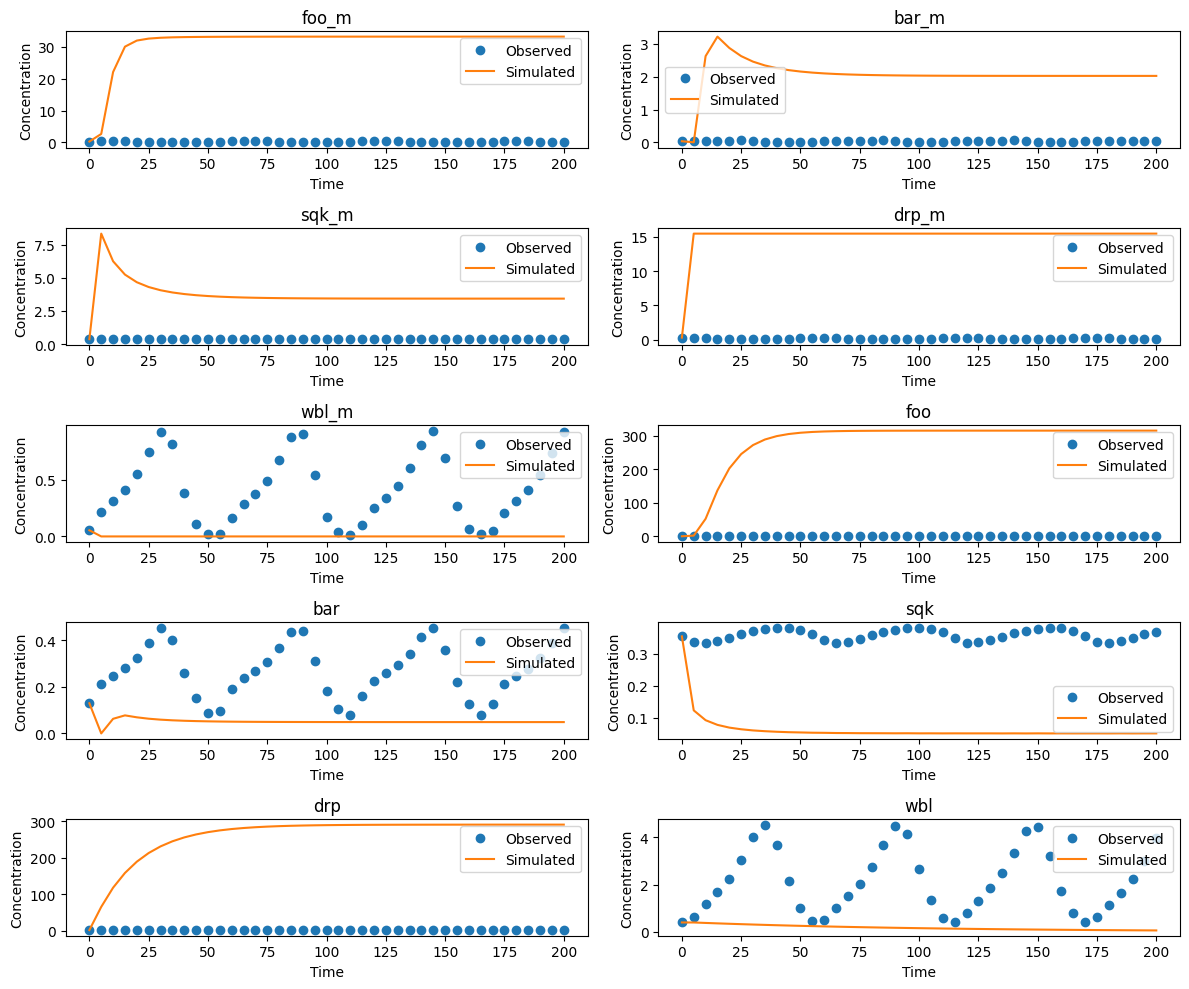

In [6]:
labels = ['foo_m', 'bar_m', 'sqk_m', 'drp_m', 'wbl_m', 'foo', 'bar', 'sqk', 'drp', 'wbl']


fig, axes = plt.subplots(5, 2, figsize=(12, 10))
axes = axes.flatten()
for i in range(10):
    ax = axes[i]
    ax.plot(t_obs, obs_data[:, i], 'o', label='Observed')
    ax.plot(t_sim, sim_data[:, i], '-', label='Simulated')
    ax.set_title(labels[i])
    ax.set_xlabel('Time')
    ax.set_ylabel('Concentration')
    ax.legend()

plt.tight_layout()

plt.savefig("simulation_vs_observed.png", dpi=300)
print("saved as simulation_vs_observed.png")

plt.show()


## **7. License**

MIT License

Copyright (c) 2025 Xuanstar42

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## **8. FAIR Discussion**

1. Findable: All data, notebook, environment requirement, license are uploaded on the github on: https://github.com/Xuanstar42/BERN02_Exercise1.git

   Keywords allow the viewers to find this notebook quickly and precisely.


2. Accessible: The github repository is set to be public, and can be accessed by anyone. The MIT license allow all users access legally. All the package used in the notebook can be freely downloaded

3. Interoperable: The format of data is csv file. The code can be run on the conda environment.

4. Reuseable: The MIT license allow the users to modify the code. Users can change the parameter values freely. This allow them to use this notebook according to their demands.